# Canadian ETF Selection 
## Data Analysis Using Python
<hr style="border:1px solid gray">

## Project Objective

The primary goal of this project is to analyze Canadian exchange-traded funds (ETF) that track the different sectors of the Toronto Stock Exchange (TSE) to find the ETF with the best potential based on both risk and return. The ETF's will be compared with each other as well as compared to the S&P/TSX Composite Index, which is the benchmark Canadian index that represents around 70% of the total market capitalization of the TSE. 

We will also look at how each sector ETF is correlated with this index, and how this can potentially affect any investment decisions.

## Data

The ETF and index data will be downloaded from Yahoo Finance using the yfinance Python library. The data will then be analyzed using Python.
<hr style="border:1px solid gray">

### Preliminaries


In [4]:
# Import packages required.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

They all have .TO at the end\
XIU – tracks the S&P/TSX 60 Total Return Index - 60 large companies listed on the Toronto Stock Exchange\
XIC – tracks the S&P/TSX Capped Composite Index\
XMD – tracks the S&P/TSX MidCap Index\
XCS – tracks the S&P/TSX SmallCap Index\
XEG – tracks the S&P/TSX Capped Energy Index\
XIT – tracks the S&P/TSX Capped Information Technology Index\
XGD – tracks the S&P/TSX Capped Gold Index\
XFN – tracks the S&P/TSX Capped Financials Index\
XMA – tracks the S&P/TSX Capped Materials Index\
XRE – tracks the S&P/TSX Capped Real Estate Investment Trust Index\
XUT - tracks Capped Utilities Index ETF\
XST - tracks Capped Consumer Staples Index ETF

In [5]:
tickers = ['^GSPTSE', 'XIU.TO', 'XIC.TO', 'XMD.TO', 'XCS.TO', 'XEG.TO', 'XIT.TO', 'XGD.TO', 'XFN.TO', 'XMA.TO'\
           , 'XRE.TO', 'XUT.TO', 'XST.TO']

In [6]:
df = yf.download(tickers, start='2015-01-01')['Adj Close']

[*********************100%***********************]  13 of 13 completed


In [7]:
df = df.pct_change()

In [8]:
# Mean daily returns
df.mean().nlargest(len(df))

XIT.TO     0.000691
XGD.TO     0.000547
XEG.TO     0.000428
XST.TO     0.000372
XMA.TO     0.000365
XFN.TO     0.000358
XIU.TO     0.000326
XUT.TO     0.000311
XIC.TO     0.000311
XMD.TO     0.000256
XRE.TO     0.000245
XCS.TO     0.000214
^GSPTSE    0.000198
dtype: float64

In [9]:
# Standard deviation
df.std().nsmallest(len(df))

XST.TO     0.009569
XIC.TO     0.009785
^GSPTSE    0.009867
XIU.TO     0.009934
XMD.TO     0.010498
XFN.TO     0.010958
XUT.TO     0.011008
XRE.TO     0.011053
XCS.TO     0.012868
XIT.TO     0.015641
XMA.TO     0.016518
XGD.TO     0.022090
XEG.TO     0.022551
dtype: float64

In [10]:
# Sharpe ratio
(df.mean() / df.std()).nlargest(len(df))

XIT.TO     0.044200
XST.TO     0.038861
XIU.TO     0.032812
XFN.TO     0.032629
XIC.TO     0.031734
XUT.TO     0.028216
XGD.TO     0.024752
XMD.TO     0.024431
XRE.TO     0.022206
XMA.TO     0.022100
^GSPTSE    0.020055
XEG.TO     0.018965
XCS.TO     0.016668
dtype: float64

In [11]:
(df + 1).cumprod() - 1

,XCS.TO,XEG.TO,XFN.TO,XGD.TO,XIC.TO,XIT.TO,XIU.TO,XMA.TO,XMD.TO,XRE.TO,XST.TO,XUT.TO,^GSPTSE
Date,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.008125,-0.064266,-0.021438,0.024390,-0.025674,-0.014617,-0.026292,-0.004938,-0.015716,0.010526,-0.018698,-0.001899,-0.024468
2015-01-06,-0.014895,-0.075565,-0.036255,0.085896,-0.034660,-0.028375,-0.034595,0.027983,-0.029363,0.021671,-0.044605,-0.008547,-0.034358
2015-01-07,-0.008802,-0.084040,-0.034048,0.071050,-0.032948,-0.022356,-0.031827,0.023868,-0.026055,0.052631,-0.031539,0.000476,-0.031768
2015-01-08,-0.013541,-0.067797,-0.029319,0.050901,-0.020967,-0.007739,-0.017990,0.024691,-0.019851,0.058204,-0.029061,0.004749,-0.020063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,0.331522,0.403056,0.881269,0.908219,0.742453,2.426689,0.791605,0.624491,0.542899,0.480640,0.953457,0.672552,0.363773
2023-08-04,0.344793,0.415441,0.897866,0.936413,0.751698,2.393443,0.802161,0.644864,0.550309,0.488826,0.965791,0.694601,0.371588
2023-08-08,0.337420,0.429596,0.889567,0.912730,0.750067,2.368701,0.799228,0.636006,0.543887,0.484278,0.973855,0.693304,0.369555


In [12]:
((df + 1).cumprod() - 1).loc['2023-08-09'].nlargest(len(df))

XIT.TO     2.374114
XST.TO     0.994016
XGD.TO     0.921752
XFN.TO     0.885418
XIU.TO     0.808025
XIC.TO     0.756049
XUT.TO     0.706275
XMA.TO     0.644864
XMD.TO     0.550804
XRE.TO     0.487007
XEG.TO     0.443750
^GSPTSE    0.374252
XCS.TO     0.333734
Name: 2023-08-09 00:00:00, dtype: float64

### Findings: 

- XIT has the highest Sharpe ratio and cumulative returns, followed by XST (Capped Consumer Staples Index ETF)
- XGD (S&P/TSX Capped Gold Index) is consistently the most uncorrelated to market, except during critical events such as covid.
- For most correlated, the two ETF's are XIC and XIU, with XIU being the better investment in terms of Sharpe ratio, mean daily returns, and cumulated returns. XIC only a slightly less risk as seen from standard deviation. If wanting to track index, XIU is the one to choose.
- In critical events, all sectors head towards a correlation of one, meaning if there is a market crash, all sectors also crash. 

In [13]:
df.corr()

,XCS.TO,XEG.TO,XFN.TO,XGD.TO,XIC.TO,XIT.TO,XIU.TO,XMA.TO,XMD.TO,XRE.TO,XST.TO,XUT.TO,^GSPTSE
XCS.TO,1.000000,0.681363,0.613965,0.443306,0.802886,0.444983,0.748833,0.660258,0.880797,0.589124,0.355464,0.536671,0.802274
XEG.TO,0.681363,1.000000,0.612783,0.063913,0.714146,0.235899,0.700505,0.305239,0.677771,0.410054,0.246879,0.394609,0.715018
XFN.TO,0.613965,0.612783,1.000000,-0.030739,0.890828,0.462366,0.901939,0.226425,0.746988,0.636858,0.528902,0.651923,0.890216
XGD.TO,0.443306,0.063913,-0.030739,1.000000,0.227492,0.063050,0.186250,0.890759,0.313848,0.123468,0.026618,0.158109,0.227435
XIC.TO,0.802886,0.714146,0.890828,0.227492,1.000000,0.608613,0.990495,0.501168,0.891325,0.667057,0.586299,0.711340,0.996388
XIT.TO,0.444983,0.235899,0.462366,0.063050,0.608613,1.000000,0.600613,0.227363,0.536666,0.374884,0.407680,0.382083,0.606213
XIU.TO,0.748833,0.700505,0.901939,0.186250,0.990495,0.600613,1.000000,0.460968,0.844704,0.634956,0.597048,0.701211,0.990248
XMA.TO,0.660258,0.305239,0.226425,0.890759,0.501168,0.227363,0.460968,1.000000,0.559750,0.261711,0.165365,0.289832,0.501940
XMD.TO,0.880797,0.677771,0.746988,0.313848,0.891325,0.536666,0.844704,0.559750,1.000000,0.690884,0.479893,0.665361,0.894520
XRE.TO,0.589124,0.410054,0.636858,0.123468,0.667057,0.374884,0.634956,0.261711,0.690884,1.000000,0.453274,0.658447,0.668318


In [14]:
df.corr()['^GSPTSE'].nlargest(len(df))

^GSPTSE    1.000000
XIC.TO     0.996388
XIU.TO     0.990248
XMD.TO     0.894520
XFN.TO     0.890216
XCS.TO     0.802274
XEG.TO     0.715018
XUT.TO     0.714265
XRE.TO     0.668318
XIT.TO     0.606213
XST.TO     0.584581
XMA.TO     0.501940
XGD.TO     0.227435
Name: ^GSPTSE, dtype: float64

<AxesSubplot:>

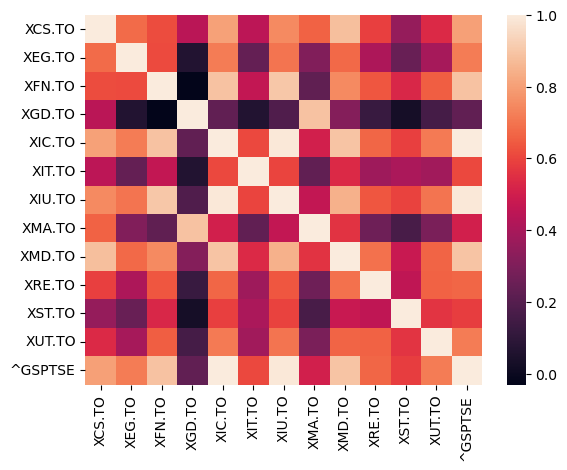

In [15]:
sns.heatmap(df.corr())

In [16]:
################################################################################### PRACTICE BELOW

In [17]:
# correlation matrix based on the last x days for each day
roll_corr = df.rolling(60).corr()

In [18]:
roll_corr

XCS.TO    XEG.TO    XFN.TO    XGD.TO    XIC.TO  \
Date                                                                   
2015-01-02 XCS.TO        NaN       NaN       NaN       NaN       NaN   
           XEG.TO        NaN       NaN       NaN       NaN       NaN   
           XFN.TO        NaN       NaN       NaN       NaN       NaN   
           XGD.TO        NaN       NaN       NaN       NaN       NaN   
           XIC.TO        NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2023-08-10 XMD.TO   0.859305  0.682198  0.742864  0.613209  0.860525   
           XRE.TO   0.623864  0.444150  0.708099  0.458123  0.749566   
           XST.TO   0.114609  0.086831  0.397711  0.188416  0.481936   
           XUT.TO   0.446045  0.234252  0.567692  0.398891  0.639264   
           ^GSPTSE  0.760830  0.650592  0.889096  0.536192  0.998038   

                      XIT.TO    XIU.TO    XMA.TO    XMD.TO    XRE.TO  \
Date                                                                   
2015-01-02 XCS.TO        NaN       NaN       NaN       NaN       NaN   
           XEG.TO        NaN       NaN       NaN       NaN       NaN   
           XFN.TO        NaN       NaN       NaN       NaN       NaN   
           XGD.TO        NaN       NaN       NaN       NaN       NaN   
           XIC.TO        NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2023-08-10 XMD.TO   0.404084  0.819942  0.799844  1.000000  0.732921   
           XRE.TO   0.359879  0.728015  0.561196  0.732921  1.000000   
           XST.TO   0.412553  0.534891  0.263978  0.196611  0.328738   
           XUT.TO   0.330374  0.669629  0.476730  0.467179  0.585189   
           ^GSPTSE  0.571782  0.993972  0.764368  0.863139  0.748316   

                      XST.TO    XUT.TO   ^GSPTSE  
Date                                              
2015-01-02 XCS.TO        NaN       NaN       NaN  
           XEG.TO        NaN       NaN       NaN  
           XFN.TO        NaN       NaN       NaN  
           XGD.TO        NaN       NaN       NaN  
           XIC.TO        NaN       NaN       NaN  
...                      ...       ...       ...  
2023-08-10 XMD.TO   0.196611  0.467179  0.863139  
           XRE.TO   0.328738  0.585189  0.748316  
           XST.TO   1.000000  0.393064  0.490279  
           XUT.TO   0.393064  1.000000  0.643674  
           ^GSPTSE  0.490279  0.643674  1.000000  

[28080 rows x 13 columns]

In [19]:
roll_corr.dropna(inplace=True)

In [20]:
roll_corr

XCS.TO    XEG.TO    XFN.TO    XGD.TO    XIC.TO  \
Date                                                                   
2015-03-30 XCS.TO   1.000000  0.497352  0.337190  0.460377  0.605447   
           XEG.TO   0.497352  1.000000  0.441498 -0.086260  0.729474   
           XFN.TO   0.337190  0.441498  1.000000 -0.321847  0.723327   
           XGD.TO   0.460377 -0.086260 -0.321847  1.000000  0.055563   
           XIC.TO   0.605447  0.729474  0.723327  0.055563  1.000000   
...                      ...       ...       ...       ...       ...   
2023-08-10 XMD.TO   0.859305  0.682198  0.742864  0.613209  0.860525   
           XRE.TO   0.623864  0.444150  0.708099  0.458123  0.749566   
           XST.TO   0.114609  0.086831  0.397711  0.188416  0.481936   
           XUT.TO   0.446045  0.234252  0.567692  0.398891  0.639264   
           ^GSPTSE  0.760830  0.650592  0.889096  0.536192  0.998038   

                      XIT.TO    XIU.TO    XMA.TO    XMD.TO    XRE.TO  \
Date                                                                   
2015-03-30 XCS.TO   0.132381  0.521767  0.602657  0.773880  0.229822   
           XEG.TO   0.184722  0.666754  0.104556  0.801559 -0.104788   
           XFN.TO   0.335109  0.707053 -0.047748  0.613809  0.146477   
           XGD.TO  -0.092185  0.052559  0.896851  0.124859  0.317922   
           XIC.TO   0.500414  0.973298  0.347997  0.871199  0.274291   
...                      ...       ...       ...       ...       ...   
2023-08-10 XMD.TO   0.404084  0.819942  0.799844  1.000000  0.732921   
           XRE.TO   0.359879  0.728015  0.561196  0.732921  1.000000   
           XST.TO   0.412553  0.534891  0.263978  0.196611  0.328738   
           XUT.TO   0.330374  0.669629  0.476730  0.467179  0.585189   
           ^GSPTSE  0.571782  0.993972  0.764368  0.863139  0.748316   

                      XST.TO    XUT.TO   ^GSPTSE  
Date                                              
2015-03-30 XCS.TO   0.159813  0.205647  0.601955  
           XEG.TO   0.131569  0.093068  0.717471  
           XFN.TO   0.305371  0.060294  0.726652  
           XGD.TO  -0.069232  0.314538  0.042730  
           XIC.TO   0.498370  0.324742  0.982306  
...                      ...       ...       ...  
2023-08-10 XMD.TO   0.196611  0.467179  0.863139  
           XRE.TO   0.328738  0.585189  0.748316  
           XST.TO   1.000000  0.393064  0.490279  
           XUT.TO   0.393064  1.000000  0.643674  
           ^GSPTSE  0.490279  0.643674  1.000000  

[27300 rows x 13 columns]

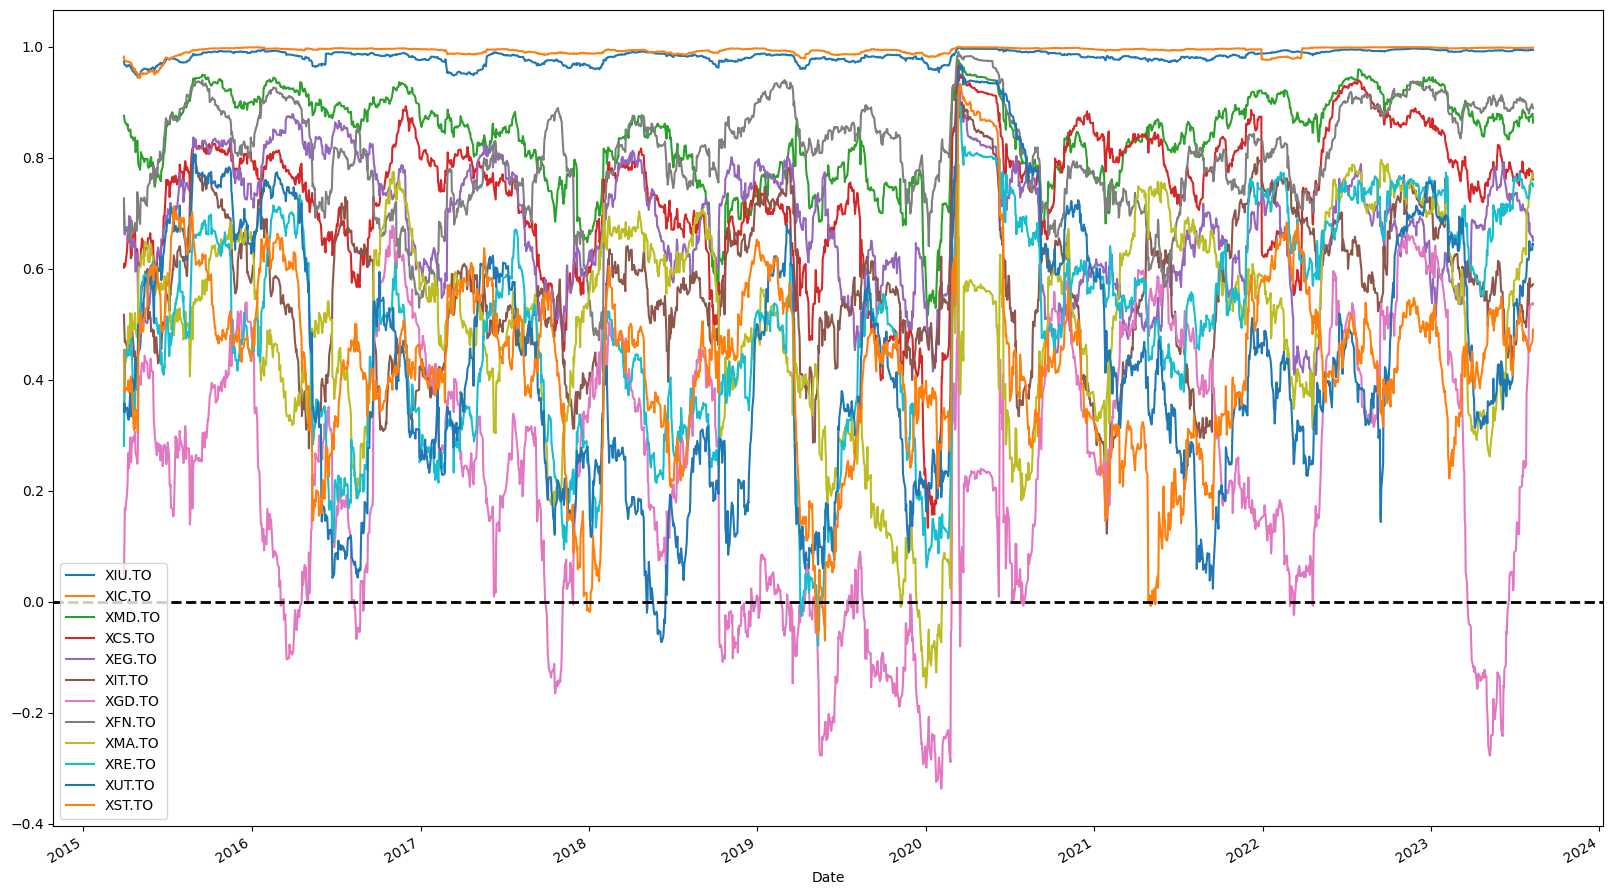

In [23]:
# main takeaway is that during a critical event like covid, all sectors start heading towards correlation of 1 with TSX
roll_corr.unstack()['^GSPTSE'][['XIU.TO', 'XIC.TO', 'XMD.TO', 'XCS.TO', 'XEG.TO', 'XIT.TO', 'XGD.TO', 'XFN.TO', 'XMA.TO'\
           , 'XRE.TO', 'XUT.TO', 'XST.TO']].plot(figsize=(20,12))
# plot hline at 0 and hline at 1
# annotate covid period and top 2 etf's that closely follow tsx
# 2 main points: 1) correlations change all the time, except the top 2. So if want something that follows index, choose 1 of 2
# and choose the one with highest sharpe/returns. 2) when critical event like covid happens, all sectors start heading towards
# 1 with TSX, meaning the whole market is going the same direction when the market crashes
plt.axhline(0.0, color='black', linestyle='--', linewidth=2)

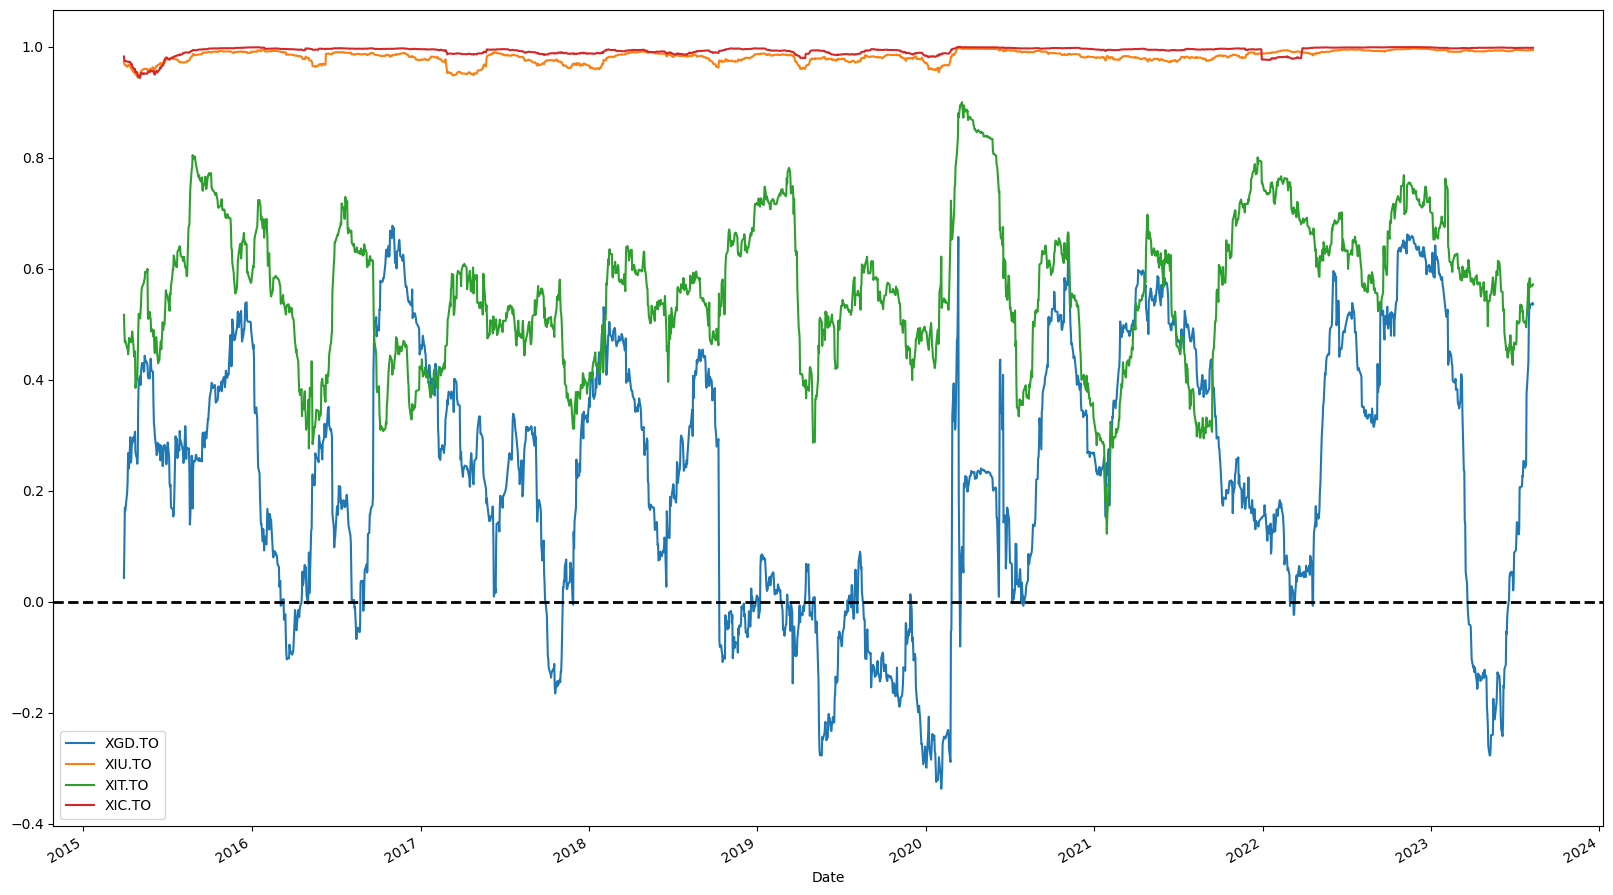

In [24]:
# Point of this is that correlations of all sectors change depending on time, but when there is acritical event like covid,
# they all start heading towards 1, even gold companies.
# Can highlight a few sectors if you want
# Main difference between XIU and XIC is number of holdings. XIU has 60 holdings while XIC has 227 (as of Aug. 8, 2023)
roll_corr.unstack()['^GSPTSE'][['XGD.TO', 'XIU.TO', 'XIT.TO', 'XIC.TO']].plot(figsize=(20,12))
plt.axhline(0.0, color='black', linestyle='--', linewidth=2)

In [ ]:
# Can diversify with XGD. XIT is the best. XIU beats XIC, so stick with XIU. XST not bad.